<h1><center>Boston Marathon</h1>

You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

## Data Preparation

In [32]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from regressors import stats,plots
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Load 2014 Boston marathon data:

In [2]:
df0 = pd.read_csv('../data/marathon.csv',low_memory=False)
df0.head(1)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43


Select relevant columns:

data = df0[['gender','age','country','ctz','5k','10k','20k','30k','40k','official']]

Use 'ctz' rather than country, if available.

data.loc[~data['ctz'].isna(),'country'] = data['ctz']

data = data.drop(columns='ctz')

Select relevant columns:

In [81]:
data = df0[['age','5k','10k','20k','30k','40k','official']]
data['male'] = df0['gender'].str.contains('M')*1
data = data.apply(pd.to_numeric,errors='coerce')
data = data.dropna()
data.head(5)

,age,5k,10k,20k,30k,40k,official,male
0,47,8.02,17.37,37.65,59.18,80.43,85.25,1
1,33,16.22,32.58,65.83,99.33,132.10,138.95,0
2,41,7.75,16.62,36.10,56.45,76.10,80.60,1
3,24,16.20,32.57,65.83,99.33,132.95,140.58,0
4,40,8.02,17.12,36.58,57.03,76.72,81.23,1


Divide into age/gender divisions:

In [82]:
data['age_div'] = 0
data.loc[data.age.between(18,34,inclusive=True),'age_div'] = 1
data.loc[data.age.between(35,39,inclusive=True),'age_div'] = 2
data.loc[data.age.between(40,44,inclusive=True),'age_div'] = 3
data.loc[data.age.between(45,49,inclusive=True),'age_div'] = 4
data.loc[data.age.between(50,54,inclusive=True),'age_div'] = 5
data.loc[data.age.between(55,59,inclusive=True),'age_div'] = 6
data.loc[data.age.between(60,64,inclusive=True),'age_div'] = 7
data.loc[data.age.between(65,69,inclusive=True),'age_div'] = 8
data.loc[data.age.between(70,74,inclusive=True),'age_div'] = 9
data.loc[data.age.between(75,79,inclusive=True),'age_div'] = 10
data.loc[data.age >= 80,'age_div'] = 11
data = data.drop(columns='age')

male_data = data.loc[data['male']==1]
female_data = data.loc[data['male']==0]

Divide by gender and normalize

In [88]:
male_X = normalize(male_data[['5k','10k','20k','30k','40k','official']])
male_Y = male_data['age_div']

female_X = normalize(female_data[['5k','10k','20k','30k','40k','official']])
female_Y = female_data['age_div']

Apply PCA (use first two components):

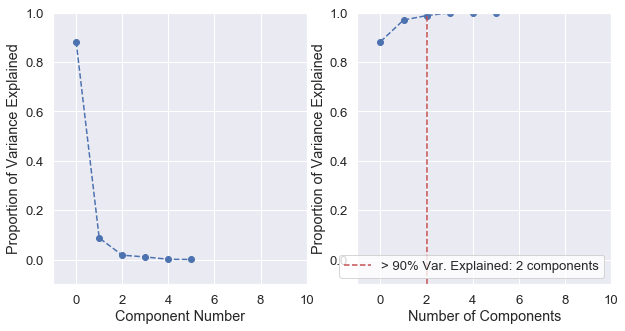

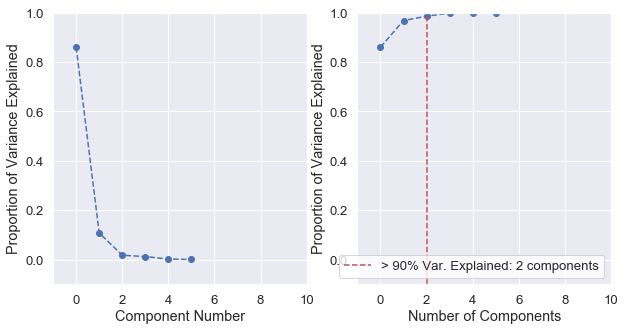

In [89]:
male_X_pca0 = PCA(6).fit(male_X)
plots.plot_scree(male_X_pca0)
male_X_pca = PCA(2).fit_transform(male_X)

female_X_pca0 = PCA(6).fit(female_X)
plots.plot_scree(female_X_pca0)
female_X_pca = PCA(2).fit_transform(female_X)

In [90]:
male_X_pca0.components_

array([[-0.1928215 , -0.36714795, -0.61009036, -0.47054166,  0.27915351,
         0.39557031],
       [ 0.31929461,  0.47632554,  0.29804582, -0.71242975, -0.07507713,
         0.26294658],
       [-0.1816674 , -0.17564392,  0.11175066,  0.15015613, -0.7259239 ,
         0.61167441],
       [ 0.5156593 ,  0.41785464, -0.65474956,  0.29503104, -0.17966912,
         0.10710596],
       [ 0.74126097, -0.64987701,  0.15481439, -0.04418783, -0.03791261,
        -0.02888987],
       [-0.11178301, -0.10258144, -0.27167213, -0.39936407, -0.59645023,
        -0.62284134]])

# K-Means

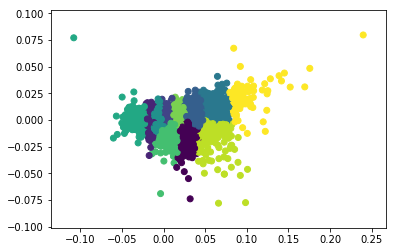

Comparing the assigned categories to the ones in the data:
age_div   1    2    3    4    5    6    7    8   9   10  11
row_0                                                      
0        217  127  112  138  122   97   71   49  19   4   1
1        791  465  589  663  561  349  203   83  17   7   1
2        484  271  381  415  325  270  163   79  13   2   0
3        174   94  104  125  134   80   71   33  14   2   0
4         78   32   47   45   37   42   24    9   5   1   0
5        685  399  504  621  545  375  233  115  45   7   1
6        696  398  434  406  283  170   78   23   3   2   0
7        246  132  189  177  178  142   99   57  25   8   5
8        366  165  221  288  241  219  130   68  16   5   0
9         51   20   29   30   32   23   27   15   6   3   0
10        20   10   12    9   10    8    8    3   1   0   0


In [94]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=11, random_state=1).fit_predict(male_X_pca)

# Plot the solution.
plt.scatter(male_X_pca[:, 0], male_X_pca[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,male_Y))

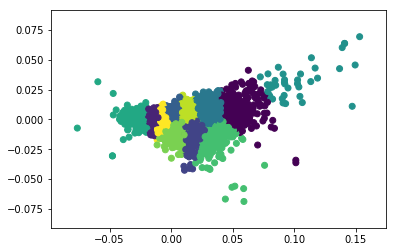

Comparing the assigned categories to the ones in the data:
age_div   1    2    3    4    5    6   7   8   9   10  11
row_0                                                    
0         69   25   37   41   19   17   5   0   0   0   0
1        880  421  504  474  280  114  38  14   0   0   0
2        341  102  121  120   95   62  29  13   0   0   1
3        667  307  323  333  223  116  56  14   4   1   0
4        246   90  126  113   93   56  27   7   1   1   0
5         15    5    9    3    4    3   0   0   0   0   0
6        628  291  262  242  128   43  14   3   0   0   0
7        117   41   58   34   40   26   9   5   3   0   0
8        431  176  173  178  126   87  45  23   2   1   0
9        529  200  232  243  169  101  38  17   1   0   0
10       949  422  478  506  307  138  79  24   7   1   0


In [95]:
y_pred = KMeans(n_clusters=11, random_state=1).fit_predict(female_X_pca)

# Plot the solution.
plt.scatter(female_X_pca[:, 0], female_X_pca[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,female_Y))

There does not appear to be a clear eleven division clustering found by K-Means. Since marathon division sizes are not equal K-Means would not be expected to work.

# Mean Shift

Number of estimated clusters: 11


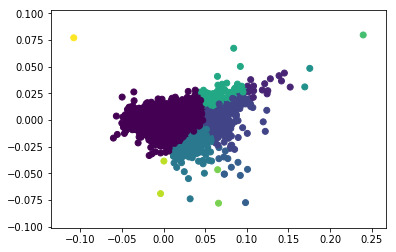

Comparing the assigned categories to the ones in the data:
age_div    1     2     3     4     5     6     7    8    9   10  11
row_0                                                              
0        3600  2016  2517  2797  2367  1686  1033  495  146  37   8
1           5     4     2     0     3     1     2    1    0   0   0
2          71    31    28    50    33    44    29   11    8   4   0
3           3     2     0     3     3     1     0    0    0   0   0
4          92    46    40    46    45    26    36   22    7   0   0
5           0     0     0     1     0     0     0    1    0   0   0
6          36    14    34    18    17    16     6    4    3   0   0
7           0     0     1     0     0     0     0    0    0   0   0
8           1     0     0     1     0     0     0    0    0   0   0
9           0     0     0     1     0     1     0    0    0   0   0
10          0     0     0     0     0     0     1    0    0   0   0


In [105]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(male_X_pca, quantile=0.4, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(male_X_pca)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(male_X_pca[:, 0], male_X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(male_Y,labels))

Number of estimated clusters: 11


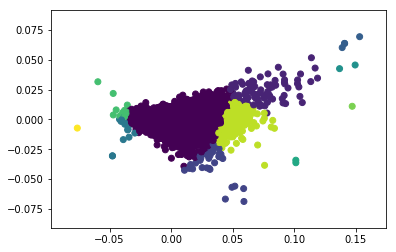

Comparing the assigned categories to the ones in the data:
age_div    1     2     3     4     5    6    7    8   9   10  11
row_0                                                           
0        4739  2030  2260  2228  1446  740  331  119  17   4   1
1          24    11    21    12    10    6    1    0   0   0   0
2          17     4     6     3     6    2    0    0   1   0   0
3           3     1     0     0     0    0    0    0   0   0   0
4           8     5     4     2     1    0    0    0   0   0   0
5           1     0     0     1     0    0    0    0   0   0   0
6           1     1     0     0     0    0    0    0   0   0   0
7           7     1     2     3     1    0    0    0   0   0   0
8           1     0     0     0     0    0    0    0   0   0   0
9          70    27    30    38    20   15    8    1   0   0   0
10          1     0     0     0     0    0    0    0   0   0   0


In [103]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(female_X_pca, quantile=0.35, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(female_X_pca)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(female_X_pca[:, 0], female_X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(female_Y,labels))

In contrast to K-Means, Mean-Shift seeks to cluster most participants together.

# Spectral Clustering

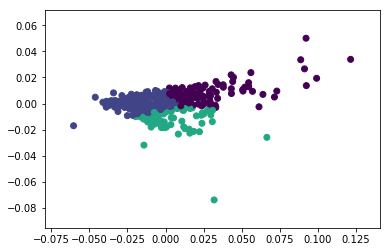

Comparing the assigned categories to the ones in the data:
col_0     0    1  2   3  4  5
age_div                      
1        75  517  1  43  1  0
2        16  120  0  12  0  0
3        13  100  0   9  0  1
4         6   41  0  10  0  0
5         5   21  0   3  0  0
6         0    5  0   1  0  0


In [111]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=6)
predict=sc.fit_predict(male_X_pca[:1000])

plt.scatter(male_X_pca[:1000, 0], male_X_pca[:1000, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(male_Y[:1000],predict))

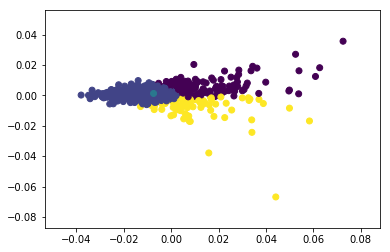

Comparing the assigned categories to the ones in the data:
col_0     0    1  2  3  4   5
age_div                      
1        99  443  1  1  0  49
2        27  150  0  0  0  15
3        17  101  0  0  1   6
4         8   51  0  0  0   3
5         1   18  0  0  0   1
6         1    7  0  0  0   0


In [112]:
sc = SpectralClustering(n_clusters=6)
predict=sc.fit_predict(female_X_pca[:1000])

plt.scatter(female_X_pca[:1000, 0], female_X_pca[:1000, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(female_Y[:1000],predict))

# Affinity Propagation

In [114]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(male_X_pca[:1000])

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Estimated number of clusters: 235


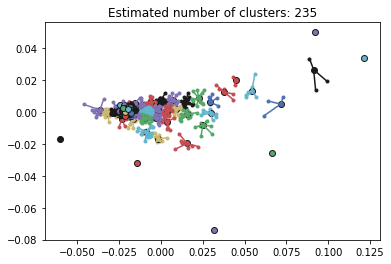

In [117]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = male_X_pca[cluster_centers_indices[k]]
    plt.plot(male_X_pca[:1000][class_members, 0], male_X_pca[:1000][class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in male_X_pca[:1000][class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()